In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
 
# 设置字体为SimHei显示中文标签
rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
 
# 纳木错流域年降雨量数据
namagecuo_rainfall = [342.65,347.66,405.24,392.54,408.63]
# 色林错流域年降雨量数据
selingcuo_rainfall = [345.93,349.08,419.94,396.11,415.84]
 
# 年份数据
years = [1985, 1993, 2004, 2015, 2022]

# Mann-Kendall趋势检验函数
def mann_kendall_trend_test(data):
    n = len(data)
    s = sum((np.sign(b - a) for a, b in zip(data[:-1], data[1:])))
    
    if n == 1:
        var_s = 0
    elif n == 2:
        var_s = 2
    else:
        unique_data = np.unique(data)
        g = [np.sum(data == x) for x in unique_data]
        ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))
        var_s = (n * (n - 1) * (2 * n + 5)) / 18 - ties
    
    z = s / np.sqrt(var_s)
    trend = '上升' if z > 0 else ('下降' if z < 0 else '无显著趋势')
    return z, trend
 
# 进行Mann-Kendall趋势检验
namagecuo_z, namagecuo_trend = mann_kendall_trend_test(namagecuo_rainfall)
selingcuo_z, selingcuo_trend = mann_kendall_trend_test(selingcuo_rainfall)
 
# 线性拟合函数
def linear_fit(data, x):
    coefficients = np.polyfit(x, data, 1)
    polynomial = np.poly1d(coefficients)
    return polynomial
 
# 获取线性拟合结果

namagecuo_poly = linear_fit(namagecuo_rainfall, years)
selingcuo_poly = linear_fit(selingcuo_rainfall, years)

C:\Users\yj\AppData\Local\Temp\ipykernel_3260\3860252755.py:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))


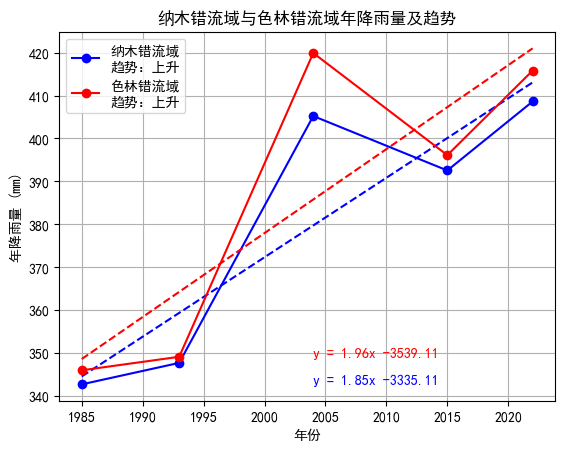

In [2]:
# 绘制图像_降雨量
fig, ax = plt.subplots()
 
# 绘制纳木错流域降雨量数据点
ax.plot(years, namagecuo_rainfall, marker='o', linestyle='-',label=f'纳木错流域\n趋势：{namagecuo_trend}', color='blue')
# 绘制纳木错流域线性拟合线
ax.plot(years, namagecuo_poly(years), color='blue', linestyle='--')
# 添加拟合方程式
ax.text(years[2], namagecuo_rainfall[0], f'y = {namagecuo_poly.c[0]:.2f}x {namagecuo_poly.c[1]:.2f}', color='blue')
 
# 绘制色林错流域降雨量数据点
ax.plot(years, selingcuo_rainfall, marker='o', linestyle='-' ,label=f'色林错流域\n趋势：{selingcuo_trend}', color='red')
# 绘制色林错流域线性拟合线
ax.plot(years, selingcuo_poly(years), color='red', linestyle='--')
# 添加拟合方程式
ax.text(years[2], selingcuo_rainfall[1], f'y = {selingcuo_poly.c[0]:.2f}x {selingcuo_poly.c[1]:.2f}', color='red')
# 设置标签和标题
ax.set_xlabel('年份')
ax.set_ylabel('年降雨量 (mm)')
ax.set_title('纳木错流域与色林错流域年降雨量及趋势')
ax.legend()
ax.grid(True)
 
# 显示图像
plt.show()


In [3]:
import numpy as np
from scipy.stats import pearsonr

# 纳木错流域年降雨量数据和面积数据
namagecuo_rainfall = [342.65,347.66,405.24,392.54,408.63]
namagecuo_area = [1949.03, 1965.64, 2005.53, 2023.08, 2026.15]

# 色林错流域年降雨量数据和面积数据
selingcuo_rainfall = [345.93,349.08,419.94,396.11,415.84]
selingcuo_area = [1677.35, 1779.78, 2112.81, 2422.34, 2471.30]

# 计算纳木错的相关系数和P值
namagecuo_corr, namagecuo_p_value = pearsonr(namagecuo_rainfall, namagecuo_area)
print(f"纳木错相关系数: {namagecuo_corr:.4f}, P值: {namagecuo_p_value:.4f}")

# 计算色林错的相关系数和P值
selingcuo_corr, selingcuo_p_value = pearsonr(selingcuo_rainfall, selingcuo_area)
print(f"色林错相关系数: {selingcuo_corr:.4f}, P值: {selingcuo_p_value:.4f}")

# 判断是否显著正相关（P < 0.05）
def is_significant_positive_correlation(corr, p_value, significance_level=0.05):
    return corr > 0 and p_value < significance_level

namagecuo_significant = is_significant_positive_correlation(namagecuo_corr, namagecuo_p_value)
selingcuo_significant = is_significant_positive_correlation(selingcuo_corr, selingcuo_p_value)

print(f"纳木错降水量与湖泊面积是否呈显著正相关 (P < 0.05): {'是' if namagecuo_significant else '否'}")
print(f"色林错降水量与湖泊面积是否呈显著正相关 (P < 0.05): {'是' if selingcuo_significant else '否'}")

纳木错相关系数: 0.9422, P值: 0.0165
色林错相关系数: 0.8416, P值: 0.0738
纳木错降水量与湖泊面积是否呈显著正相关 (P < 0.05): 是
色林错降水量与湖泊面积是否呈显著正相关 (P < 0.05): 否


In [4]:
# 纳木错流域温度数据
namagecuo_temp = [6.56,6.88,7.33,7.54,7.65]
# 色林错流域温度数据
selingcuo_temp = [7.53,7.82,8.39,8.60,8.75]
 

# Mann-Kendall趋势检验函数
def mann_kendall_trend_test(data):
    n = len(data)
    s = sum((np.sign(b - a) for a, b in zip(data[:-1], data[1:])))
    
    if n == 1:
        var_s = 0
    elif n == 2:
        var_s = 2
    else:
        unique_data = np.unique(data)
        g = [np.sum(data == x) for x in unique_data]
        ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))
        var_s = (n * (n - 1) * (2 * n + 5)) / 18 - ties
    
    z = s / np.sqrt(var_s)
    trend = '上升' if z > 0 else ('下降' if z < 0 else '无显著趋势')
    return z, trend
 
# 进行Mann-Kendall趋势检验
namagecuo_z_1, namagecuo_trend_1 = mann_kendall_trend_test(namagecuo_temp)
selingcuo_z_1, selingcuo_trend_1 = mann_kendall_trend_test(selingcuo_temp)
 
# 线性拟合函数
def linear_fit(data, x):
    coefficients = np.polyfit(x, data, 1)
    polynomial = np.poly1d(coefficients)
    return polynomial
 
# 获取线性拟合结果

namagecuo_poly_1 = linear_fit(namagecuo_temp, years)
selingcuo_poly_1 = linear_fit(selingcuo_temp, years)

C:\Users\yj\AppData\Local\Temp\ipykernel_3260\3492647698.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))


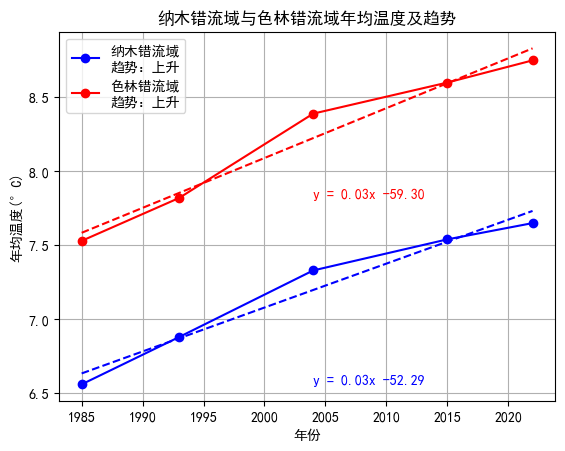

In [5]:
# 绘制图像_温度
fig, ax = plt.subplots()
 
# 绘制纳木错流域数据点
ax.plot(years, namagecuo_temp, marker='o', linestyle='-',label=f'纳木错流域\n趋势：{namagecuo_trend_1}', color='blue')
# 绘制纳木错流域线性拟合线
ax.plot(years, namagecuo_poly_1(years), color='blue', linestyle='--')
# 添加拟合方程式
ax.text(years[2], namagecuo_temp[0], f'y = {namagecuo_poly_1.c[0]:.2f}x {namagecuo_poly_1.c[1]:.2f}', color='blue')
 
# 绘制色林错流域降雨量数据点
ax.plot(years, selingcuo_temp, marker='o', linestyle='-' ,label=f'色林错流域\n趋势：{selingcuo_trend_1}', color='red')
# 绘制色林错流域线性拟合线
ax.plot(years, selingcuo_poly_1(years), color='red', linestyle='--')
# 添加拟合方程式
ax.text(years[2], selingcuo_temp[1], f'y = {selingcuo_poly_1.c[0]:.2f}x {selingcuo_poly_1.c[1]:.2f}', color='red')
# 设置标签和标题
ax.set_xlabel('年份')
ax.set_ylabel('年均温度(°C)')
ax.set_title('纳木错流域与色林错流域年均温度及趋势')
ax.legend()
ax.grid(True)
 
# 显示图像
plt.show()

In [6]:

# 纳木错流域年均气温数据和面积数据
# namagecuo_temp = [6.56,6.88,7.33,7.54,7.65]
# namagecuo_area = [1949.03, 1965.64, 2005.53, 2023.08, 2026.15]

# 色林错流域年均气温数据和面积数据
# selingcuo_temp = [7.53,7.82,8.39,8.60,8.75]
# selingcuo_area = [1677.35, 1779.78, 2112.81, 2422.34, 2471.30]

# 计算纳木错的相关系数和P值
namagecuo_corr_1, namagecuo_p_value_1 = pearsonr(namagecuo_temp, namagecuo_area)
print(f"纳木错相关系数: {namagecuo_corr_1:.4f}, P值: {namagecuo_p_value_1:.4f}")

# 计算色林错的相关系数和P值
selingcuo_corr_1, selingcuo_p_value_1 = pearsonr(selingcuo_temp, selingcuo_area)
print(f"色林错相关系数: {selingcuo_corr_1:.4f}, P值: {selingcuo_p_value_1:.4f}")

namagecuo_significant_1 = is_significant_positive_correlation(namagecuo_corr_1, namagecuo_p_value_1)
selingcuo_significant_1 = is_significant_positive_correlation(selingcuo_corr_1, selingcuo_p_value_1)

print(f"纳木错年均气温与湖泊面积是否呈显著正相关 (P < 0.05): {'是' if namagecuo_significant_1 else '否'}")
print(f"色林错年均气温与湖泊面积是否呈显著正相关 (P < 0.05): {'是' if selingcuo_significant_1 else '否'}")

纳木错相关系数: 0.9953, P值: 0.0004
色林错相关系数: 0.9816, P值: 0.0030
纳木错年均气温与湖泊面积是否呈显著正相关 (P < 0.05): 是
色林错年均气温与湖泊面积是否呈显著正相关 (P < 0.05): 是


In [14]:
# 纳木错流域-念青唐古拉冰川面积数据
namagecuo_glacier = [1681.92,1482.35,1481.06,856.86,1066.13]
# 色林错流域-格拉丹东冰川面积数据
selingcuo_glacier = [972.79,974.97,917.89,873.00,865.18]
 

# Mann-Kendall趋势检验函数
def mann_kendall_trend_test(data):
    n = len(data)
    s = sum((np.sign(b - a) for a, b in zip(data[:-1], data[1:])))
    
    if n == 1:
        var_s = 0
    elif n == 2:
        var_s = 2
    else:
        unique_data = np.unique(data)
        g = [np.sum(data == x) for x in unique_data]
        ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))
        var_s = (n * (n - 1) * (2 * n + 5)) / 18 - ties
    
    z = s / np.sqrt(var_s)
    trend = '上升' if z > 0 else ('下降' if z < 0 else '无显著趋势')
    return z, trend
 
# 进行Mann-Kendall趋势检验
namagecuo_z_2, namagecuo_trend_2 = mann_kendall_trend_test(namagecuo_glacier)
selingcuo_z_2, selingcuo_trend_2 = mann_kendall_trend_test(selingcuo_glacier)
 
# 线性拟合函数
def linear_fit(data, x):
    coefficients = np.polyfit(x, data, 1)
    polynomial = np.poly1d(coefficients)
    return polynomial
 
# 获取线性拟合结果

namagecuo_poly_2 = linear_fit(namagecuo_glacier, years)
selingcuo_poly_2 = linear_fit(selingcuo_glacier, years)

C:\Users\yj\AppData\Local\Temp\ipykernel_3260\4013561284.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))


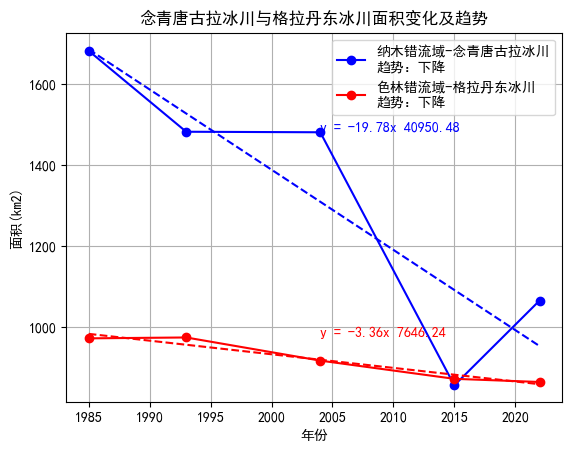

In [17]:
# 绘制图像_冰川面积
fig, ax = plt.subplots()
 
# 绘制纳木错流域数据点
ax.plot(years, namagecuo_glacier, marker='o', linestyle='-',label=f'纳木错流域-念青唐古拉冰川\n趋势：{namagecuo_trend_2}', color='blue')
# 绘制纳木错流域线性拟合线
ax.plot(years, namagecuo_poly_2(years), color='blue', linestyle='--')
# 添加拟合方程式
ax.text(years[2], namagecuo_glacier[1], f'y = {namagecuo_poly_2.c[0]:.2f}x {namagecuo_poly_2.c[1]:.2f}', color='blue')
 
# 绘制色林错流域数据点
ax.plot(years, selingcuo_glacier, marker='o', linestyle='-' ,label=f'色林错流域-格拉丹东冰川\n趋势：{selingcuo_trend_2}', color='red')
# 绘制色林错流域线性拟合线
ax.plot(years, selingcuo_poly_2(years), color='red', linestyle='--')
# 添加拟合方程式
ax.text(years[2], selingcuo_glacier[1], f'y = {selingcuo_poly_2.c[0]:.2f}x {selingcuo_poly_2.c[1]:.2f}', color='red')
# 设置标签和标题
ax.set_xlabel('年份')
ax.set_ylabel('面积(km2)')
ax.set_title('念青唐古拉冰川与格拉丹东冰川面积变化及趋势')
ax.legend()
ax.grid(True)
 
# 显示图像
plt.show()

In [19]:
# 纳木错流域与念青唐古拉冰川面积数据
# namagecuo_glacier = [1681.92,1482.35,1481.06,856.86,]
# namagecuo_area = [1949.03, 1965.64, 2005.53, 2023.08, 2026.15]

# 色林错流域与格拉丹东冰川面积数据
# selingcuo_glacier = [972.79,974.97,917.89,873.00,865.18]
# selingcuo_area = [1677.35, 1779.78, 2112.81, 2422.34, 2471.30]

# 计算纳木错的相关系数和P值
namagecuo_corr_2, namagecuo_p_value_2 = pearsonr(namagecuo_glacier, namagecuo_area)

print(f"纳木错相关系数: {namagecuo_corr_2:.4f}, P值: {namagecuo_p_value_2:.4f}")

# 计算色林错的相关系数和P值
selingcuo_corr_2, selingcuo_p_value_2 = pearsonr(selingcuo_glacier, selingcuo_area)
print(f"色林错相关系数: {selingcuo_corr_2:.4f}, P值: {selingcuo_p_value_2:.4f}")

namagecuo_significant_2 = is_significant_positive_correlation(namagecuo_corr_2, namagecuo_p_value_2)
selingcuo_significant_2 = is_significant_positive_correlation(selingcuo_corr_2, selingcuo_p_value_2)

print(f"纳木错湖泊面积与念青唐古拉冰川面积是否呈显著正相关 (P < 0.05): {'是' if namagecuo_significant_2 else '否'}")
print(f"色林错湖泊面积与格拉丹东冰川面积是否呈显著正相关 (P < 0.05): {'是' if selingcuo_significant_2 else '否'}")

纳木错相关系数: -0.8599, P值: 0.0616
色林错相关系数: -0.9934, P值: 0.0006
纳木错湖泊面积与念青唐古拉冰川面积是否呈显著正相关 (P < 0.05): 否
色林错湖泊面积与格拉丹东冰川面积是否呈显著正相关 (P < 0.05): 否


In [10]:

# 进行两个湖泊面积的Mann-Kendall趋势检验
namagecuo_z_0, namagecuo_trend_0 = mann_kendall_trend_test(namagecuo_area)
selingcuo_z_0, selingcuo_trend_0 = mann_kendall_trend_test(selingcuo_area)

 
# 获取线性拟合结果

namagecuo_poly_0 = linear_fit(namagecuo_area, years)
selingcuo_poly_0 = linear_fit(selingcuo_area, years)

C:\Users\yj\AppData\Local\Temp\ipykernel_3260\4013561284.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ties = np.sum((g_i ** 3 - g_i) for g_i in g) / (18 * n * (n - 1) * (n - 2))


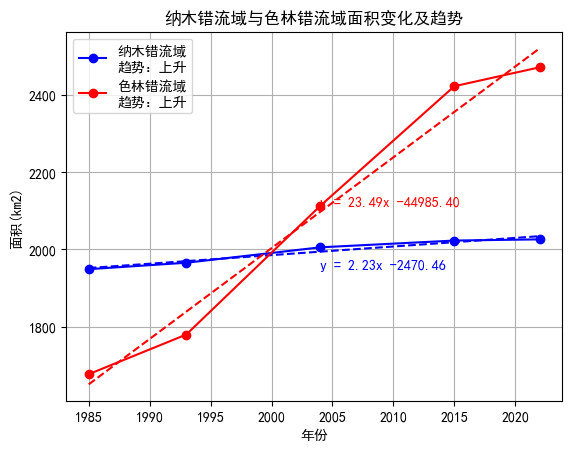

In [11]:
# 绘制两个湖泊的面积
fig, ax = plt.subplots()
 
# 绘制纳木错流域数据点
ax.plot(years, namagecuo_area, marker='o', linestyle='-',label=f'纳木错流域\n趋势：{namagecuo_trend_0}', color='blue')
# 绘制纳木错流域线性拟合线
ax.plot(years, namagecuo_poly_0(years), color='blue', linestyle='--')
# 添加拟合方程式
ax.text(years[2], namagecuo_area[0], f'y = {namagecuo_poly_0.c[0]:.2f}x {namagecuo_poly_0.c[1]:.2f}', color='blue')
 
# 绘制色林错流域降雨量数据点
ax.plot(years, selingcuo_area, marker='o', linestyle='-' ,label=f'色林错流域\n趋势：{selingcuo_trend_0}', color='red')
# 绘制色林错流域线性拟合线
ax.plot(years, selingcuo_poly_0(years), color='red', linestyle='--')
# 添加拟合方程式
ax.text(years[2], selingcuo_area[2], f'y = {selingcuo_poly_0.c[0]:.2f}x {selingcuo_poly_0.c[1]:.2f}', color='red')
# 设置标签和标题
ax.set_xlabel('年份')
ax.set_ylabel('面积(km2)')
ax.set_title('纳木错流域与色林错流域面积变化及趋势')
ax.legend()
ax.grid(True)
 
# 显示图像
plt.show()